In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import yfinance as yf
import math
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
#nifty = pdr.get_data_tiingo("INDF", api_key = "30f0d443a2a115c661a899929861dccfa07e7478" )
df = yf.download('^NSEI',start="2018-01-01", end="2022-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-26 00:00:00+05:30,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700
2022-12-27 00:00:00+05:30,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300
2022-12-28 00:00:00+05:30,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900
2022-12-29 00:00:00+05:30,18045.699219,18229.699219,17992.800781,18191.000000,18191.000000,281100
2022-12-30 00:00:00+05:30,18259.099609,18265.250000,18080.300781,18105.300781,18105.300781,192000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232 entries, 2018-01-02 00:00:00+05:30 to 2022-12-30 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1232 non-null   float64
 1   High       1232 non-null   float64
 2   Low        1232 non-null   float64
 3   Close      1232 non-null   float64
 4   Adj Close  1232 non-null   float64
 5   Volume     1232 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.4 KB


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02 00:00:00+05:30,10477.549805,10495.200195,10404.650391,10442.200195,10442.200195,153400
2018-01-03 00:00:00+05:30,10482.650391,10503.599609,10429.549805,10443.200195,10443.200195,167300
2018-01-04 00:00:00+05:30,10469.400391,10513.000000,10441.450195,10504.799805,10504.799805,174900
2018-01-05 00:00:00+05:30,10534.250000,10566.099609,10520.099609,10558.849609,10558.849609,180900
2018-01-08 00:00:00+05:30,10591.700195,10631.200195,10588.549805,10623.599609,10623.599609,169000
...,...,...,...,...,...,...
2022-12-26 00:00:00+05:30,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700
2022-12-27 00:00:00+05:30,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300
2022-12-28 00:00:00+05:30,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900


In [6]:
df["Return"] = df["Adj Close"].pct_change()

In [7]:
df1 = df.drop(columns = ["Open","High","Low","Adj Close", "Volume"])

In [8]:
df1

,Close,Return
Date,,
2018-01-02 00:00:00+05:30,10442.200195,NaN
2018-01-03 00:00:00+05:30,10443.200195,0.000096
2018-01-04 00:00:00+05:30,10504.799805,0.005899
2018-01-05 00:00:00+05:30,10558.849609,0.005145
2018-01-08 00:00:00+05:30,10623.599609,0.006132
...,...,...
2022-12-26 00:00:00+05:30,18014.599609,0.011670
2022-12-27 00:00:00+05:30,18132.300781,0.006534
2022-12-28 00:00:00+05:30,18122.500000,-0.000541


In [9]:
df1["Log_Return"] = np.log(1+df1["Return"])

In [10]:
df1 = df1.dropna()

In [11]:
df2 = df1["Log_Return"]

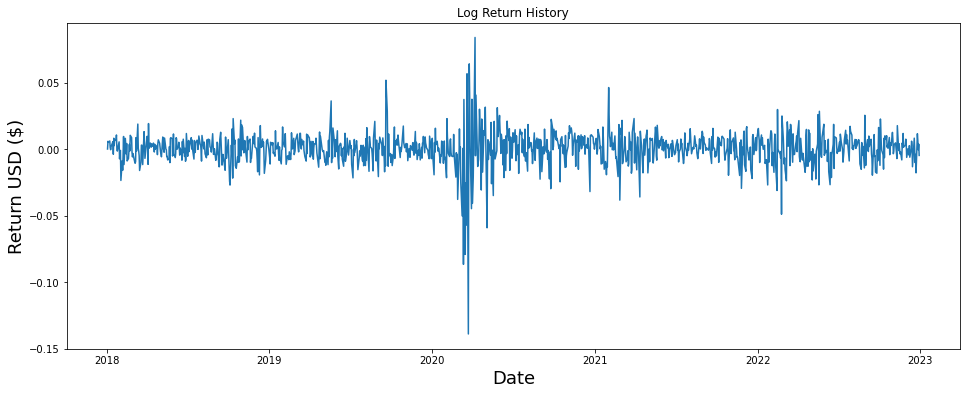

In [12]:
plt.figure(figsize=(16,6))
plt.title('Log Return History')
plt.plot(df2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Return USD ($)', fontsize=18)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = scaler.fit_transform(np.array(df2).reshape(-1, 1))

In [14]:
df3

array([[-0.02842593],
       [ 0.43969255],
       [ 0.37907631],
       ...,
       [-0.07992078],
       [ 0.26908705],
       [-0.41826279]])

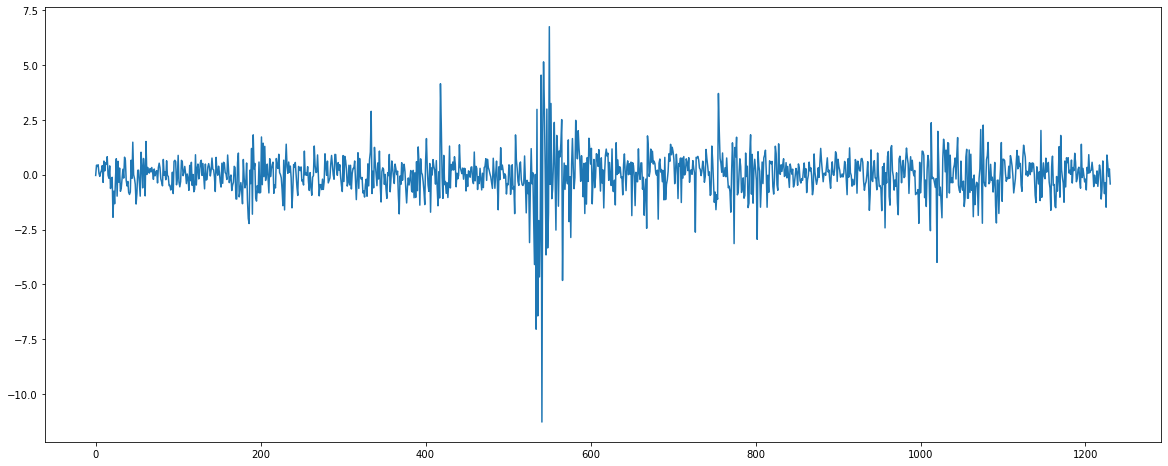

In [15]:
plt.figure(figsize = (20,8))
plt.plot(df3)

In [16]:
train_size = int(len(df3)*0.8)
test_size = len(df3)-train_size
train_size,test_size

(984, 247)

In [17]:
train_data,test_data = df3[0:train_size],df3[train_size:]

In [18]:
train_data.shape,test_data.shape

((984, 1), (247, 1))

In [19]:
def creat_dataset(data, time_stamp):
    data_x, data_y = [], []
    for i in range(len(data)-time_stamp-1):
        a = data[i: i + time_stamp, 0]
        data_x.append(a)
        b = data[i+time_stamp,0]
        data_y.append(b)
    return data_x, data_y
                

In [20]:
x_train, y_train = creat_dataset(train_data,50)
x_test, y_test = creat_dataset(test_data,50)

In [21]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x_train,x_test

(array([[-0.02842593,  0.43969255,  0.37907631, ..., -0.16003603,
         -0.43156559, -1.3352012 ],
        [ 0.43969255,  0.37907631,  0.45849363, ..., -0.43156559,
         -1.3352012 , -0.84095195],
        [ 0.37907631,  0.45849363,  0.06582356, ..., -1.3352012 ,
         -0.84095195,  0.204738  ],
        ...,
        [ 0.57261738, -0.29188353, -0.70734283, ..., -0.36313657,
          0.3554563 ,  0.65697665],
        [-0.29188353, -0.70734283, -0.4291434 , ...,  0.3554563 ,
          0.65697665, -0.12848884],
        [-0.70734283, -0.4291434 , -0.31797229, ...,  0.65697665,
         -0.12848884, -0.08154892]]),
 array([[ 0.78390718,  0.50731698, -0.84982064, ...,  1.12725024,
         -1.04138229,  1.46650923],
        [ 0.50731698, -0.84982064,  0.26782568, ..., -1.04138229,
          1.46650923,  1.4360751 ],
        [-0.84982064,  0.26782568,  0.82502218, ...,  1.46650923,
          1.4360751 , -0.83321341],
        ...,
        [ 0.77461648,  0.55536495,  0.77833316, ..., -

In [22]:
import seaborn as sns 
from sklearn.preprocessing import Normalizer
normalizedx_train = Normalizer().fit_transform(x_train)

normalizedx_train = pd.DataFrame(normalizedx_train)
normalizedx_train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.006248,0.096645,0.083321,0.100777,0.014468,-0.015978,0.023802,0.042154,0.092168,-0.076130,...,-0.177964,-0.197122,-0.173654,0.146296,-0.035408,0.327200,0.001346,-0.035176,-0.094858,-0.293478
1,0.095037,0.081935,0.099100,0.014227,-0.015712,0.023406,0.041452,0.090635,-0.074863,0.135582,...,-0.193842,-0.170764,0.143862,-0.034819,0.321756,0.001323,-0.034591,-0.093280,-0.288595,-0.181766
2,0.082226,0.099453,0.014278,-0.015768,0.023489,0.041600,0.090957,-0.075130,0.136064,0.038376,...,-0.171371,0.144373,-0.034943,0.322900,0.001328,-0.034714,-0.093612,-0.289621,-0.182413,0.044410
3,0.099686,0.014311,-0.015805,0.023545,0.041697,0.091171,-0.075306,0.136383,0.038466,0.118051,...,0.144712,-0.035025,0.323658,0.001331,-0.034795,-0.093832,-0.290301,-0.182841,0.044514,0.045746
4,0.014339,-0.015835,0.023590,0.041777,0.091346,-0.075451,0.136645,0.038540,0.118278,0.107418,...,-0.035092,0.324279,0.001334,-0.034862,-0.094012,-0.290858,-0.183192,0.044600,0.045834,-0.078315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,0.121765,0.125771,0.096322,-0.049099,-0.118985,-0.072188,-0.053487,0.001802,0.100875,-0.048956,...,-0.117728,-0.040099,-0.087640,0.015237,-0.215378,-0.306672,0.121645,0.142912,0.087632,-0.061085
929,0.126485,0.096869,-0.049377,-0.119660,-0.072597,-0.053791,0.001812,0.101447,-0.049234,-0.274586,...,-0.040326,-0.088137,0.015324,-0.216600,-0.308412,0.122335,0.143723,0.088129,-0.061431,0.060132
930,0.097046,-0.049468,-0.119879,-0.072730,-0.053889,0.001815,0.101633,-0.049324,-0.275088,-0.149402,...,-0.088298,0.015352,-0.216996,-0.308976,0.122559,0.143985,0.088290,-0.061543,0.060242,0.111343
931,-0.049690,-0.120418,-0.073058,-0.054132,0.001824,0.102090,-0.049546,-0.276327,-0.150075,0.193493,...,0.015421,-0.217973,-0.310367,0.123111,0.144634,0.088688,-0.061821,0.060513,0.111844,-0.021874


<AxesSubplot:>

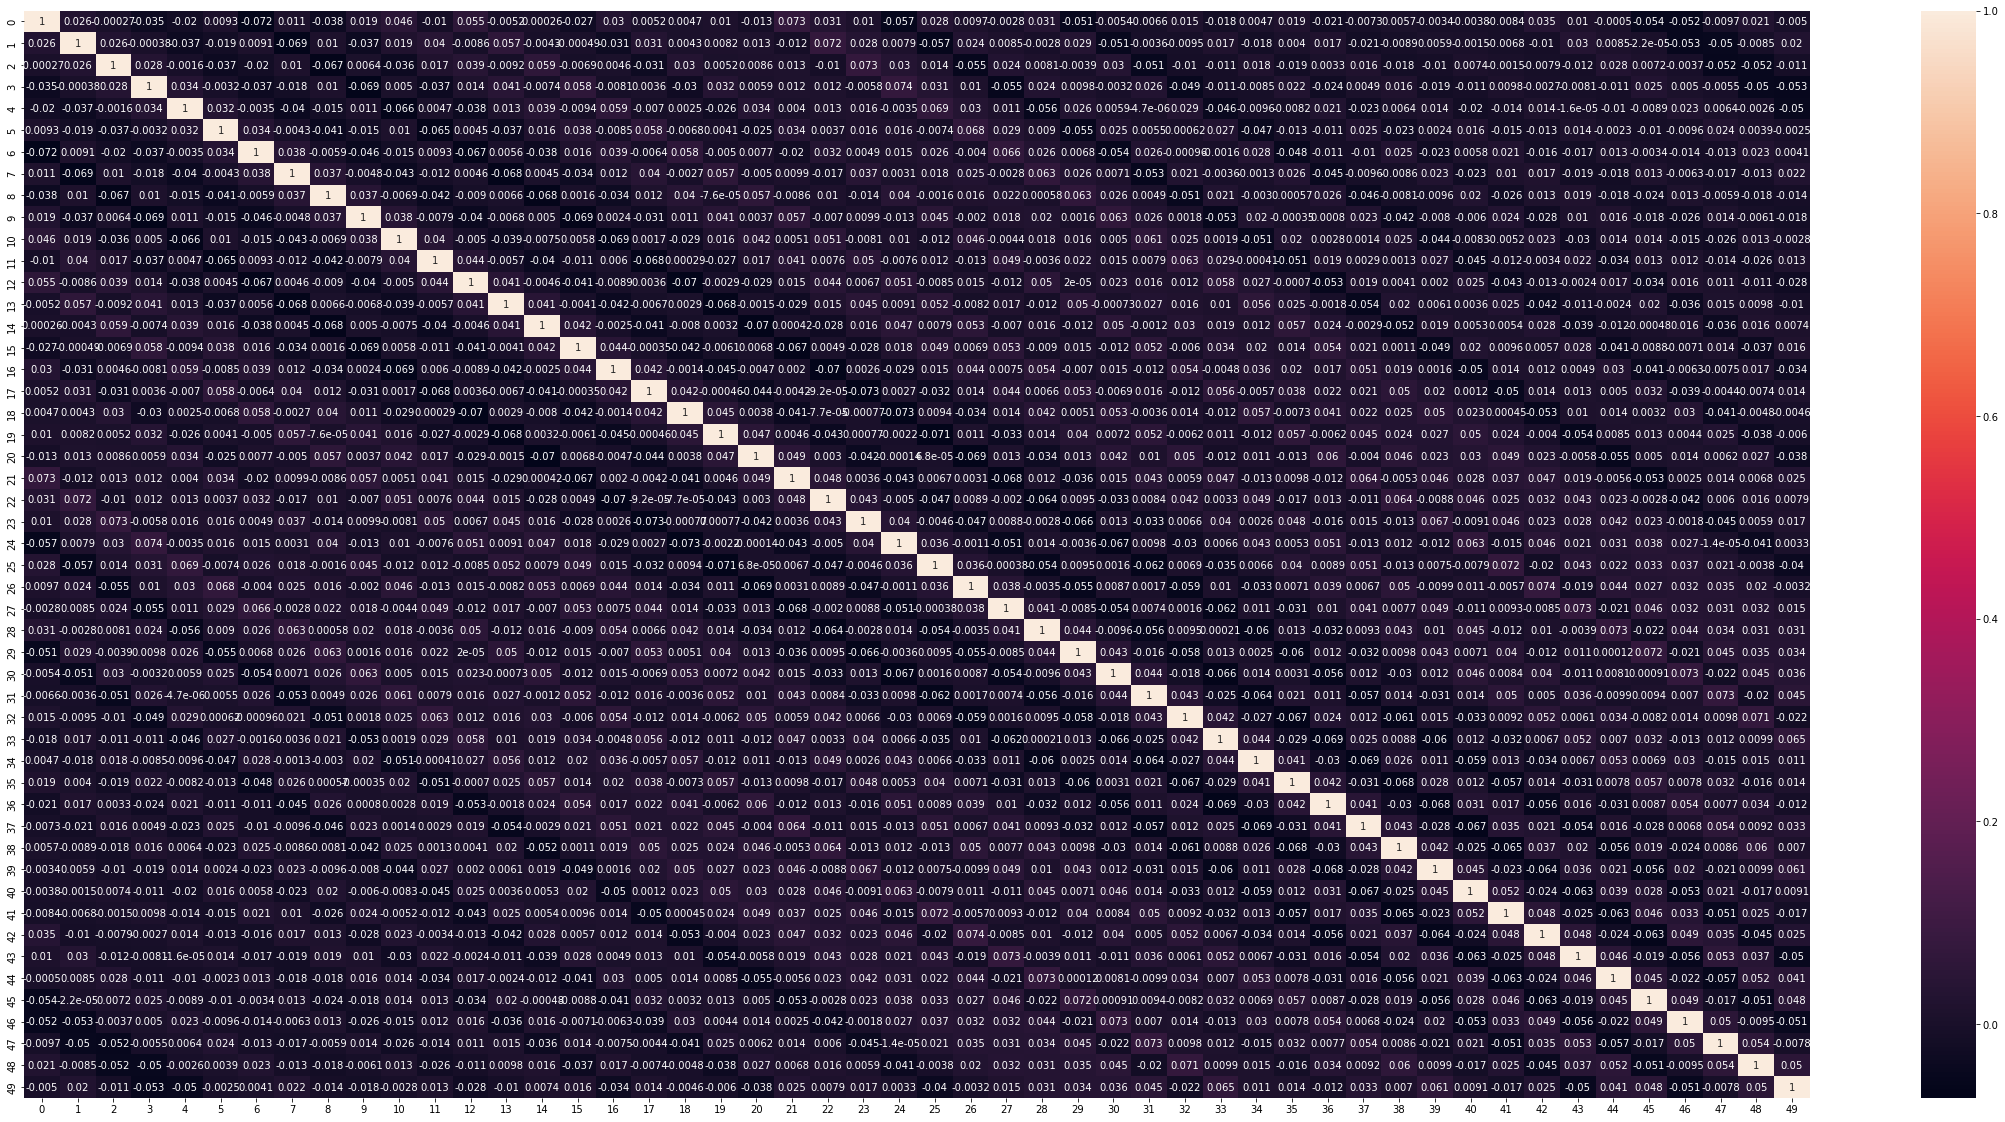

In [23]:
# plot correlation heatmap
plt.figure(figsize = (40,20))
sns.heatmap(normalizedx_train.corr(), annot = True)

In [24]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [25]:
x_train.shape, x_test.shape

((933, 50, 1), (196, 50, 1))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model_1 = Sequential()
model_1.add(LSTM(50, return_sequences = True, input_shape = (50,1)))
model_1.add(LSTM(50, return_sequences= True))
model_1.add(LSTM(50, return_sequences= True))
model_1.add(LSTM(50))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_1.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 50, batch_size = 9, verbose = 1)

Epoch 1/50
104/104 [==============================] - 29s 98ms/step - loss: 1.0960 - val_loss: 0.6256
Epoch 2/50
104/104 [==============================] - 6s 58ms/step - loss: 1.0943 - val_loss: 0.6270
Epoch 3/50
104/104 [==============================] - 7s 65ms/step - loss: 1.0921 - val_loss: 0.6267
Epoch 4/50
104/104 [==============================] - 5s 50ms/step - loss: 1.0923 - val_loss: 0.6264
Epoch 5/50
104/104 [==============================] - 5s 51ms/step - loss: 1.0910 - val_loss: 0.6271
Epoch 6/50
104/104 [==============================] - 6s 56ms/step - loss: 1.0898 - val_loss: 0.6259
Epoch 7/50
104/104 [==============================] - 6s 55ms/step - loss: 1.0914 - val_loss: 0.6275
Epoch 8/50
104/104 [==============================] - 7s 65ms/step - loss: 1.0903 - val_loss: 0.6277
Epoch 9/50
104/104 [==============================] - 7s 64ms/step - loss: 1.0895 - val_loss: 0.6271
Epoch 10/50
104/104 [==============================] - 7s 70ms/step - loss: 1.0892 - val_l

In [30]:
train_pred = model_1.predict(x_train)
test_pred = model_1.predict(x_test)
train_pred, test_pred

7/7 [==============================] - 0s 44ms/step


(array([[0.0117718 ],
        [0.01168129],
        [0.01079983],
        [0.01022308],
        [0.01033513],
        [0.01084747],
        [0.01005521],
        [0.00992394],
        [0.01058576],
        [0.01034439],
        [0.01044215],
        [0.01121527],
        [0.01032577],
        [0.01050079],
        [0.01060646],
        [0.01079617],
        [0.01093861],
        [0.01087775],
        [0.01103579],
        [0.0108152 ],
        [0.0108723 ],
        [0.01111114],
        [0.01084194],
        [0.01084775],
        [0.01076041],
        [0.01065807],
        [0.01090457],
        [0.01066958],
        [0.01038269],
        [0.01038147],
        [0.01074007],
        [0.01103349],
        [0.01121595],
        [0.01057013],
        [0.01052358],
        [0.01051246],
        [0.01073427],
        [0.01041584],
        [0.01057549],
        [0.01075633],
        [0.01106763],
        [0.01117073],
        [0.01122424],
        [0.01111207],
        [0.01053103],
        [0

In [31]:
train_pred.shape

(933, 1)

In [32]:
y_train.shape, train_pred.shape,y_test.shape

((933,), (933, 1), (196,))

In [33]:
def accuracy_LSTM(data_1, data_2):
    x = (np.sign(np.array(data_1)) == np.sign(np.array(data_2)))
    
    return print(sum(x[0]) / len(x))

In [34]:
accuracy_LSTM(train_pred, y_train)

0.5316184351554126


In [35]:
accuracy_LSTM(test_pred, y_test)

0.47959183673469385


In [36]:
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = train_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1.04


In [37]:
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = test_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.79


In [38]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
train_pred.shape, test_pred.shape

((933, 1), (196, 1))

In [39]:
math.sqrt(mean_squared_error(y_train, train_pred))

1.043930766482102

In [40]:
math.sqrt(mean_squared_error(y_test, test_pred))

0.7913821033332359

In [41]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back = 50
trainPredictPlot = numpy.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred

In [42]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df3)-1, :] = test_pred

In [43]:
testPredictPlot

array([[       nan],
       [       nan],
       [       nan],
       ...,
       [0.00056725],
       [0.00057083],
       [       nan]])

In [44]:
df3 = scaler.inverse_transform(df3)

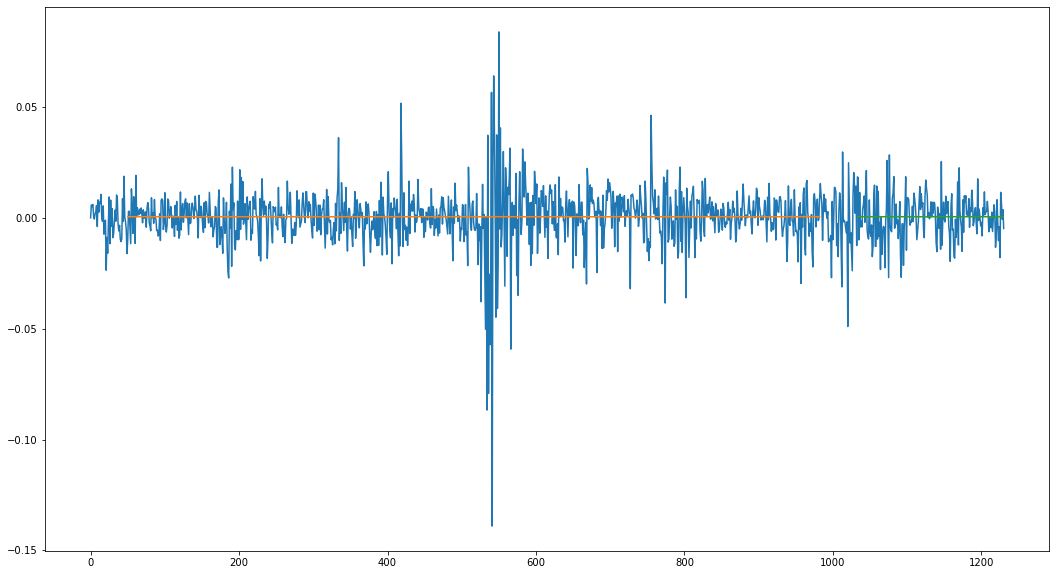

In [45]:
# plot baseline and predictions
plt.figure(figsize = (18,10))
plt.plot((df3))
plt.plot((trainPredictPlot))
plt.plot((testPredictPlot))
plt.show()

In [46]:
len(train_data),len(test_data)

(984, 247)

In [47]:
time_stamp = 50
var = len(test_data)-time_stamp
x_input = test_data[var:].reshape(1,-1)
x_input.shape

(1, 50)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [49]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<1):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.0107099]
51


In [50]:
lst_output = scaler.inverse_transform(lst_output)

In [51]:
day_new=np.arange(1,51)
day_pred=np.arange(51,52)

In [52]:
import matplotlib.pyplot as plt

In [53]:
len(df3)

1231

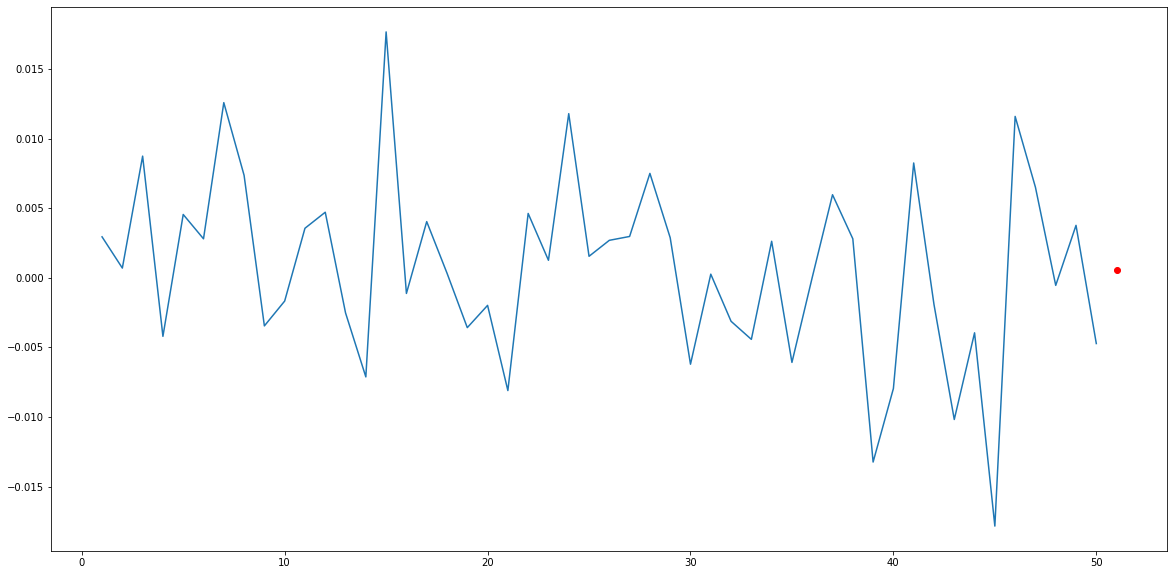

In [54]:
var_1 = len(df3)-time_stamp
plt.figure(figsize = (20,10))
plt.plot(day_new,(df3[var_1:]))
plt.scatter(day_pred,(lst_output), c = "r")

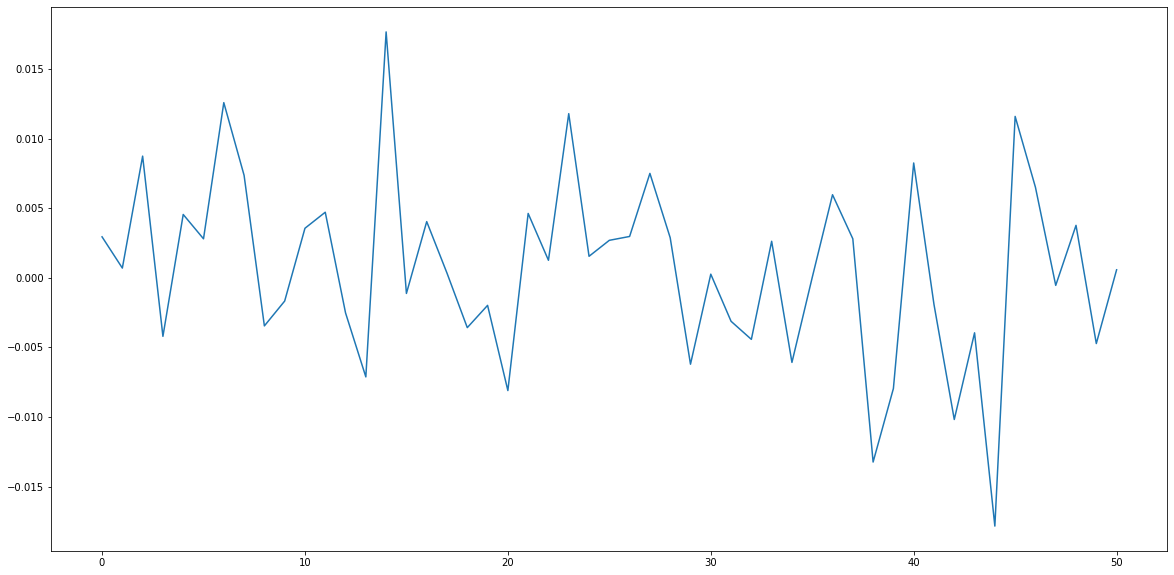

In [55]:
plt.figure(figsize = (20,10))
df3 = df3.tolist()
df3.extend((lst_output))
plt.plot((df3[var_1:]))

In [56]:
check_df = yf.download('^NSEI',start="2022-12-01", end="2023-01-03",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [57]:
check_df["Close"].tail(10)

Date
2022-12-20 00:00:00+05:30    18385.300781
2022-12-21 00:00:00+05:30    18199.099609
2022-12-22 00:00:00+05:30    18127.349609
2022-12-23 00:00:00+05:30    17806.800781
2022-12-26 00:00:00+05:30    18014.599609
2022-12-27 00:00:00+05:30    18132.300781
2022-12-28 00:00:00+05:30    18122.500000
2022-12-29 00:00:00+05:30    18191.000000
2022-12-30 00:00:00+05:30    18105.300781
2023-01-02 00:00:00+05:30    18197.449219
Name: Close, dtype: float64

In [58]:
check_df.to_csv("^GSPC_check.csv")

In [59]:
check_df = pd.read_csv("^GSPC_check.csv")

In [60]:
check_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23 non-null     object 
 1   Open       23 non-null     float64
 2   High       23 non-null     float64
 3   Low        23 non-null     float64
 4   Close      23 non-null     float64
 5   Adj Close  23 non-null     float64
 6   Volume     23 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.4+ KB


In [61]:
check_df["Date"] = pd.to_datetime(check_df["Date"])

In [62]:
check_df = check_df.set_index("Date")

In [63]:
check_df["Return"] = check_df.Close.pct_change()

In [64]:
check_df1 = check_df["Return"].dropna()
check_df1,df1[1425:]

(Date
 2022-12-02 00:00:00+05:30   -0.006187
 2022-12-05 00:00:00+05:30    0.000265
 2022-12-06 00:00:00+05:30   -0.003118
 2022-12-07 00:00:00+05:30   -0.004412
 2022-12-08 00:00:00+05:30    0.002632
 2022-12-09 00:00:00+05:30   -0.006059
 2022-12-12 00:00:00+05:30    0.000030
 2022-12-13 00:00:00+05:30    0.005993
 2022-12-14 00:00:00+05:30    0.002811
 2022-12-15 00:00:00+05:30   -0.013151
 2022-12-16 00:00:00+05:30   -0.007923
 2022-12-19 00:00:00+05:30    0.008290
 2022-12-20 00:00:00+05:30   -0.001908
 2022-12-21 00:00:00+05:30   -0.010128
 2022-12-22 00:00:00+05:30   -0.003943
 2022-12-23 00:00:00+05:30   -0.017683
 2022-12-26 00:00:00+05:30    0.011670
 2022-12-27 00:00:00+05:30    0.006534
 2022-12-28 00:00:00+05:30   -0.000541
 2022-12-29 00:00:00+05:30    0.003780
 2022-12-30 00:00:00+05:30   -0.004711
 2023-01-02 00:00:00+05:30    0.005090
 Name: Return, dtype: float64,
 Empty DataFrame
 Columns: [Close, Return, Log_Return]
 Index: [])

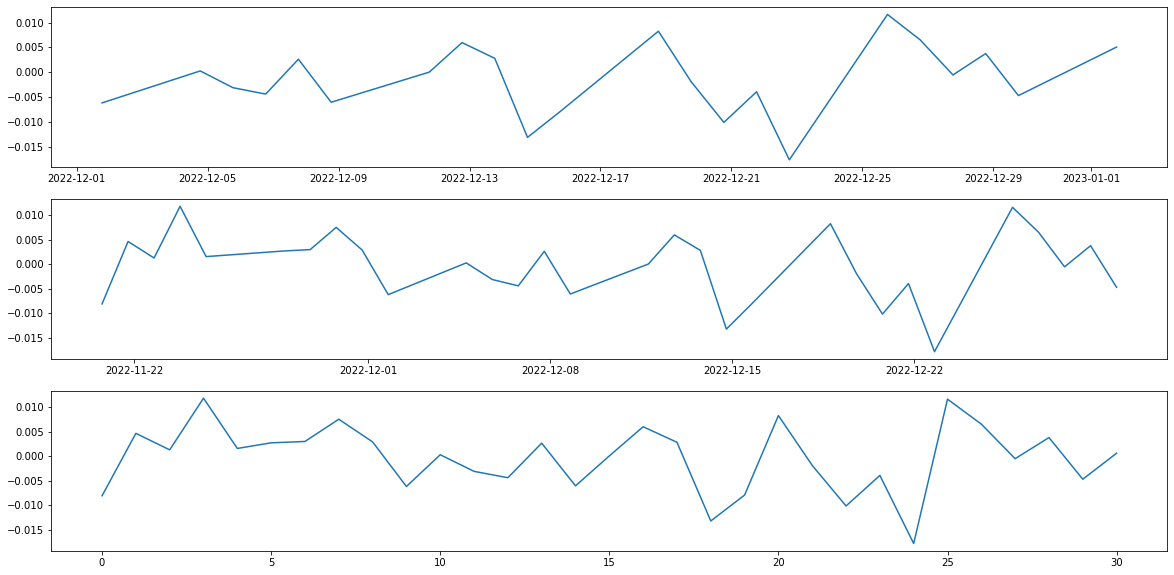

In [65]:
plt.figure(figsize = (20,10))
plt.subplot(3,1,1)
plt.plot(check_df1);
plt.subplot(3,1,2)
plt.plot(df2[var_1+20:])
plt.subplot(3,1,3)
plt.plot((df3[var_1+20:]))